## TASK 3

## CAR PRICE PREDICTION

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score


In [4]:
df = pd.read_csv(r"C:\Users\asus\Downloads\car data.csv")
df




,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0
...,...,...,...,...,...,...,...,...,...
296,city,2016,9.50,11.60,33988,Diesel,Dealer,Manual,0
297,brio,2015,4.00,5.90,60000,Petrol,Dealer,Manual,0
298,city,2009,3.35,11.00,87934,Petrol,Dealer,Manual,0
299,city,2017,11.50,12.50,9000,Diesel,Dealer,Manual,0


In [5]:
df.head()



,Car_Name,Year,Selling_Price,Present_Price,Driven_kms,Fuel_Type,Selling_type,Transmission,Owner
0,ritz,2014,3.35,5.59,27000,Petrol,Dealer,Manual,0
1,sx4,2013,4.75,9.54,43000,Diesel,Dealer,Manual,0
2,ciaz,2017,7.25,9.85,6900,Petrol,Dealer,Manual,0
3,wagon r,2011,2.85,4.15,5200,Petrol,Dealer,Manual,0
4,swift,2014,4.60,6.87,42450,Diesel,Dealer,Manual,0


In [6]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 301 entries, 0 to 300
Data columns (total 9 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Car_Name       301 non-null    object 
 1   Year           301 non-null    int64  
 2   Selling_Price  301 non-null    float64
 3   Present_Price  301 non-null    float64
 4   Driven_kms     301 non-null    int64  
 5   Fuel_Type      301 non-null    object 
 6   Selling_type   301 non-null    object 
 7   Transmission   301 non-null    object 
 8   Owner          301 non-null    int64  
dtypes: float64(2), int64(3), object(4)
memory usage: 21.3+ KB


In [7]:
print(df.describe())




              Year  Selling_Price  Present_Price     Driven_kms       Owner
count   301.000000     301.000000     301.000000     301.000000  301.000000
mean   2013.627907       4.661296       7.628472   36947.205980    0.043189
std       2.891554       5.082812       8.642584   38886.883882    0.247915
min    2003.000000       0.100000       0.320000     500.000000    0.000000
25%    2012.000000       0.900000       1.200000   15000.000000    0.000000
50%    2014.000000       3.600000       6.400000   32000.000000    0.000000
75%    2016.000000       6.000000       9.900000   48767.000000    0.000000
max    2018.000000      35.000000      92.600000  500000.000000    3.000000


In [8]:
print(df.columns)


Index(['Car_Name', 'Year', 'Selling_Price', 'Present_Price', 'Driven_kms',
       'Fuel_Type', 'Selling_type', 'Transmission', 'Owner'],
      dtype='object')


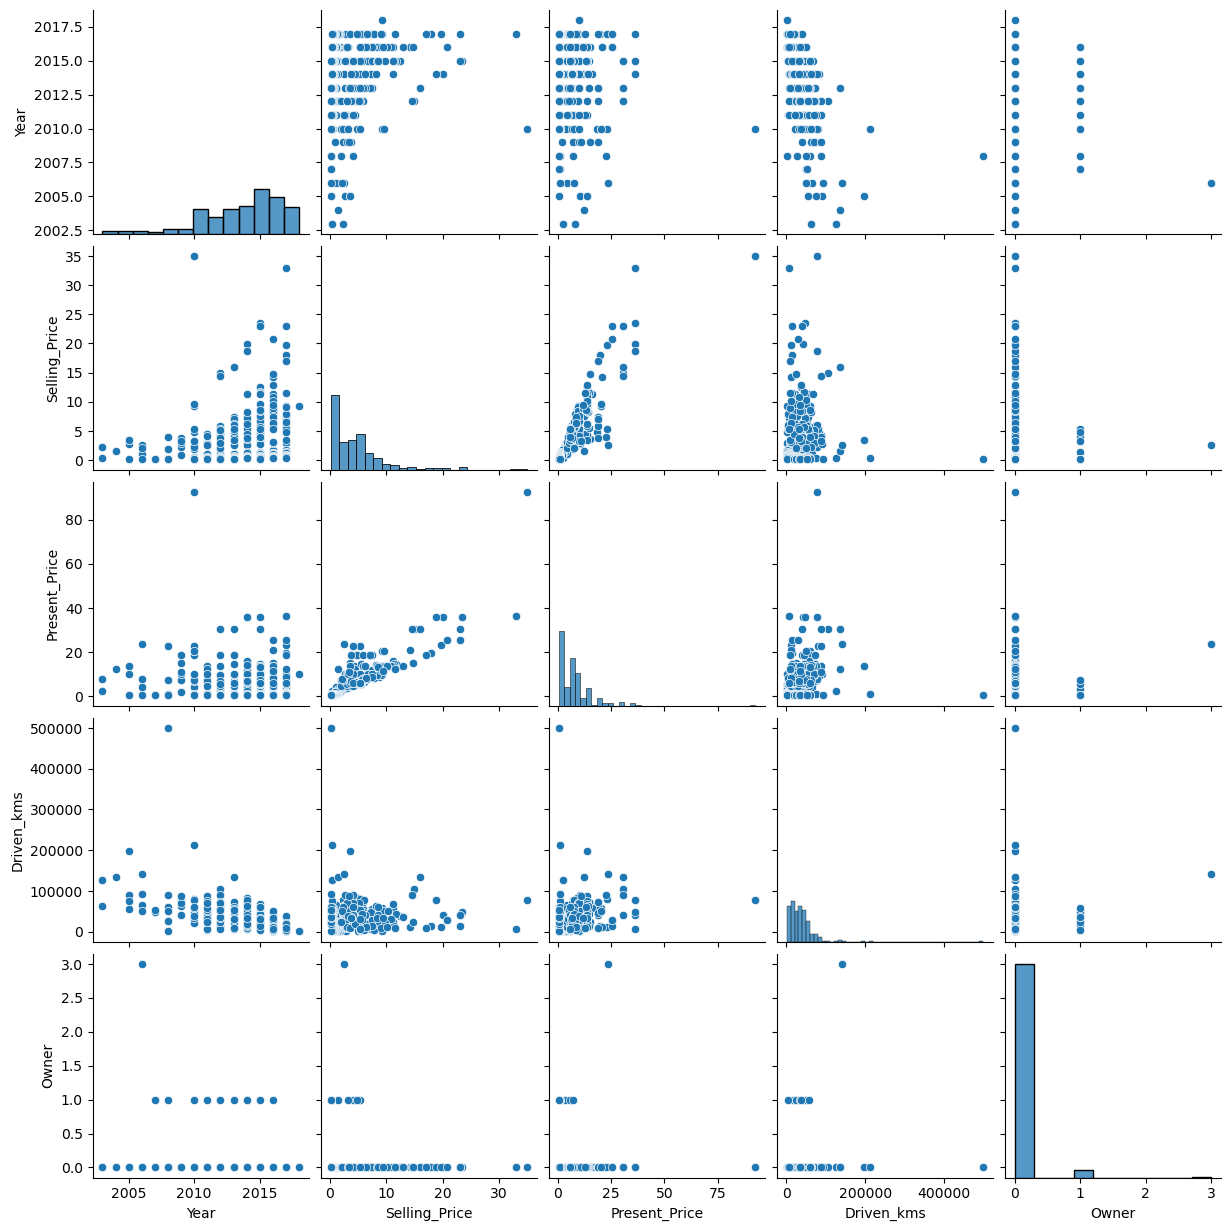

In [9]:
sns.pairplot(df)
plt.show()


In [10]:
print(df['Fuel_Type'].unique())



['Petrol' 'Diesel' 'CNG']


In [11]:
print(df['Selling_type'].unique())


['Dealer' 'Individual']


In [12]:
print(df['Transmission'].unique())

['Manual' 'Automatic']


In [13]:
df_encoded = pd.get_dummies(df, drop_first=True)
df_encoded

,Year,Selling_Price,Present_Price,Driven_kms,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,3.35,5.59,27000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,4.75,9.54,43000,0,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,7.25,9.85,6900,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,2.85,4.15,5200,0,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,4.60,6.87,42450,0,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,9.50,11.60,33988,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
297,2015,4.00,5.90,60000,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
298,2009,3.35,11.00,87934,0,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
299,2017,11.50,12.50,9000,0,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [14]:
X = df_encoded.drop('Selling_Price', axis=1)
y = df_encoded['Selling_Price']
X


,Year,Present_Price,Driven_kms,Owner,Car_Name_Activa 3g,Car_Name_Activa 4g,Car_Name_Bajaj ct 100,Car_Name_Bajaj Avenger 150,Car_Name_Bajaj Avenger 150 street,Car_Name_Bajaj Avenger 220,...,Car_Name_swift,Car_Name_sx4,Car_Name_verna,Car_Name_vitara brezza,Car_Name_wagon r,Car_Name_xcent,Fuel_Type_Diesel,Fuel_Type_Petrol,Selling_type_Individual,Transmission_Manual
0,2014,5.59,27000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
1,2013,9.54,43000,0,False,False,False,False,False,False,...,False,True,False,False,False,False,True,False,False,True
2,2017,9.85,6900,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
3,2011,4.15,5200,0,False,False,False,False,False,False,...,False,False,False,False,True,False,False,True,False,True
4,2014,6.87,42450,0,False,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,True
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,2016,11.60,33988,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True
297,2015,5.90,60000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
298,2009,11.00,87934,0,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,False,True
299,2017,12.50,9000,0,False,False,False,False,False,False,...,False,False,False,False,False,False,True,False,False,True


In [15]:
y

0       3.35
1       4.75
2       7.25
3       2.85
4       4.60
       ...  
296     9.50
297     4.00
298     3.35
299    11.50
300     5.30
Name: Selling_Price, Length: 301, dtype: float64

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train, X_test, y_train, y_test


(     Year  Present_Price  Driven_kms  Owner  Car_Name_Activa 3g  \
 184  2008          0.750       26000      1               False   
 132  2017          0.950        3500      0               False   
 194  2008          0.787       50000      0               False   
 75   2015          6.800       36000      0               False   
 111  2016          1.500        8700      0               False   
 ..    ...            ...         ...    ...                 ...   
 188  2013          0.570       18000      0               False   
 71   2011         12.480       45000      0               False   
 106  2014          3.450       16500      1               False   
 270  2011         10.000       69341      0               False   
 102  2017          1.780        4000      0               False   
 
      Car_Name_Activa 4g  Car_Name_Bajaj  ct 100  Car_Name_Bajaj Avenger 150  \
 184               False                   False                       False   
 132               Fal

In [17]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

In [18]:
y_pred = model.predict(X_test)
y_pred

array([ 7.47327051,  9.58880632,  5.56883578, -0.40941815,  8.55896043,
        6.88890857,  1.47635719,  6.23695329,  0.98014478,  6.68925428,
       15.63172868,  0.29557627,  7.97759508,  8.08373758,  6.19289061,
        2.70151483,  2.72386344, 10.98923224,  7.77090451,  8.56271721,
        5.55477855,  7.63455899,  5.6498586 ,  1.89746929,  6.25342368,
        3.48912822,  5.48662283,  1.6085983 ,  2.6805568 ,  2.67421952,
       -0.03307212,  9.11656913, -2.33116821,  1.98326133,  8.36119393,
        3.98900218,  6.09888859,  6.17398282,  4.27677317,  6.74710603,
        5.51688689,  8.34755944,  3.67455712,  0.25706045, 13.06489129,
        0.04497286,  8.34319661,  9.55198302,  3.90152259,  4.03845455,
        5.9287072 ,  2.70075543, 22.92984367, 20.60225579,  7.30522747,
        9.84045173,  4.59171221,  8.91665681,  0.05897455,  6.62617599,
        3.66819743])

In [19]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)

print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 9.221090391444099
R-squared Score: 0.5997023481942921


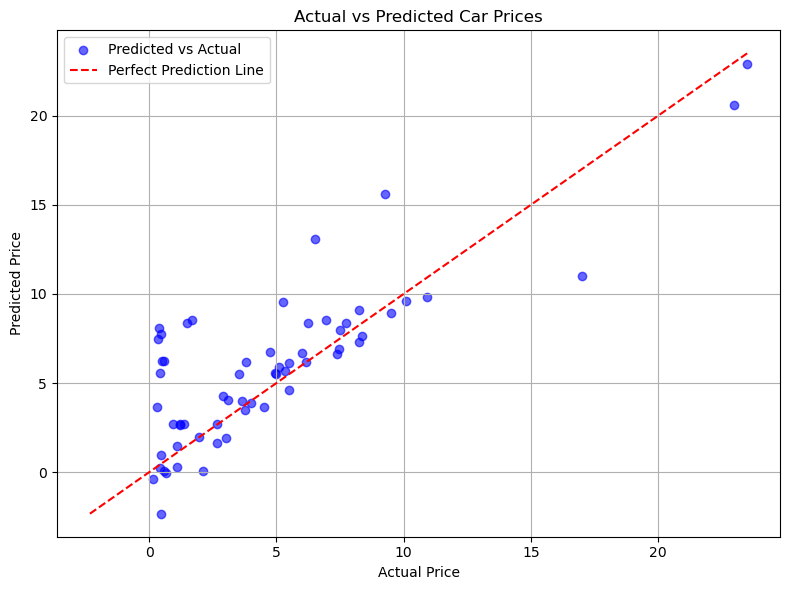

In [25]:
plt.figure(figsize=(8,6))

# Scatter plot of Actual vs Predicted values
plt.scatter(y_test, y_pred, color='blue', alpha=0.6, label='Predicted vs Actual')

# Add a diagonal line for reference (perfect prediction)
min_val = min(min(y_test), min(y_pred))
max_val = max(max(y_test), max(y_pred))
plt.plot([min_val, max_val], [min_val, max_val], color='red', linestyle='--', label='Perfect Prediction Line')

# Labels and title
plt.xlabel("Actual Price")
plt.ylabel("Predicted Price")
plt.title("Actual vs Predicted Car Prices")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()


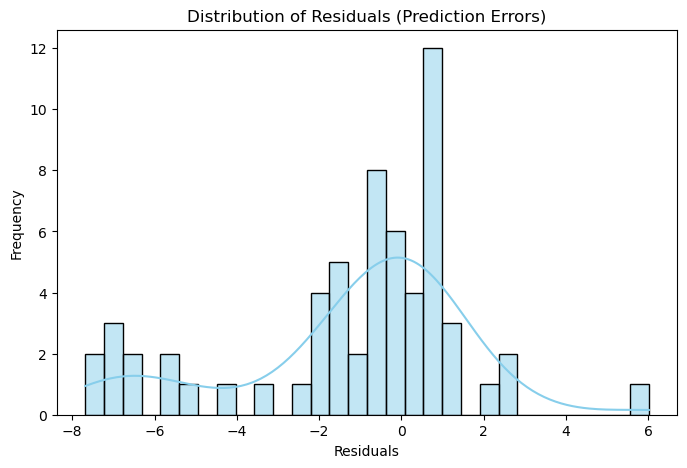

In [33]:
#Residual Plot (Errors between actual and predicted)
residuals = y_test - y_pred
plt.figure(figsize=(8,5))
sns.histplot(residuals, bins=30, kde=True, color='skyblue')
plt.title("Distribution of Residuals (Prediction Errors)")
plt.xlabel("Residuals")
plt.ylabel("Frequency")
plt.show()


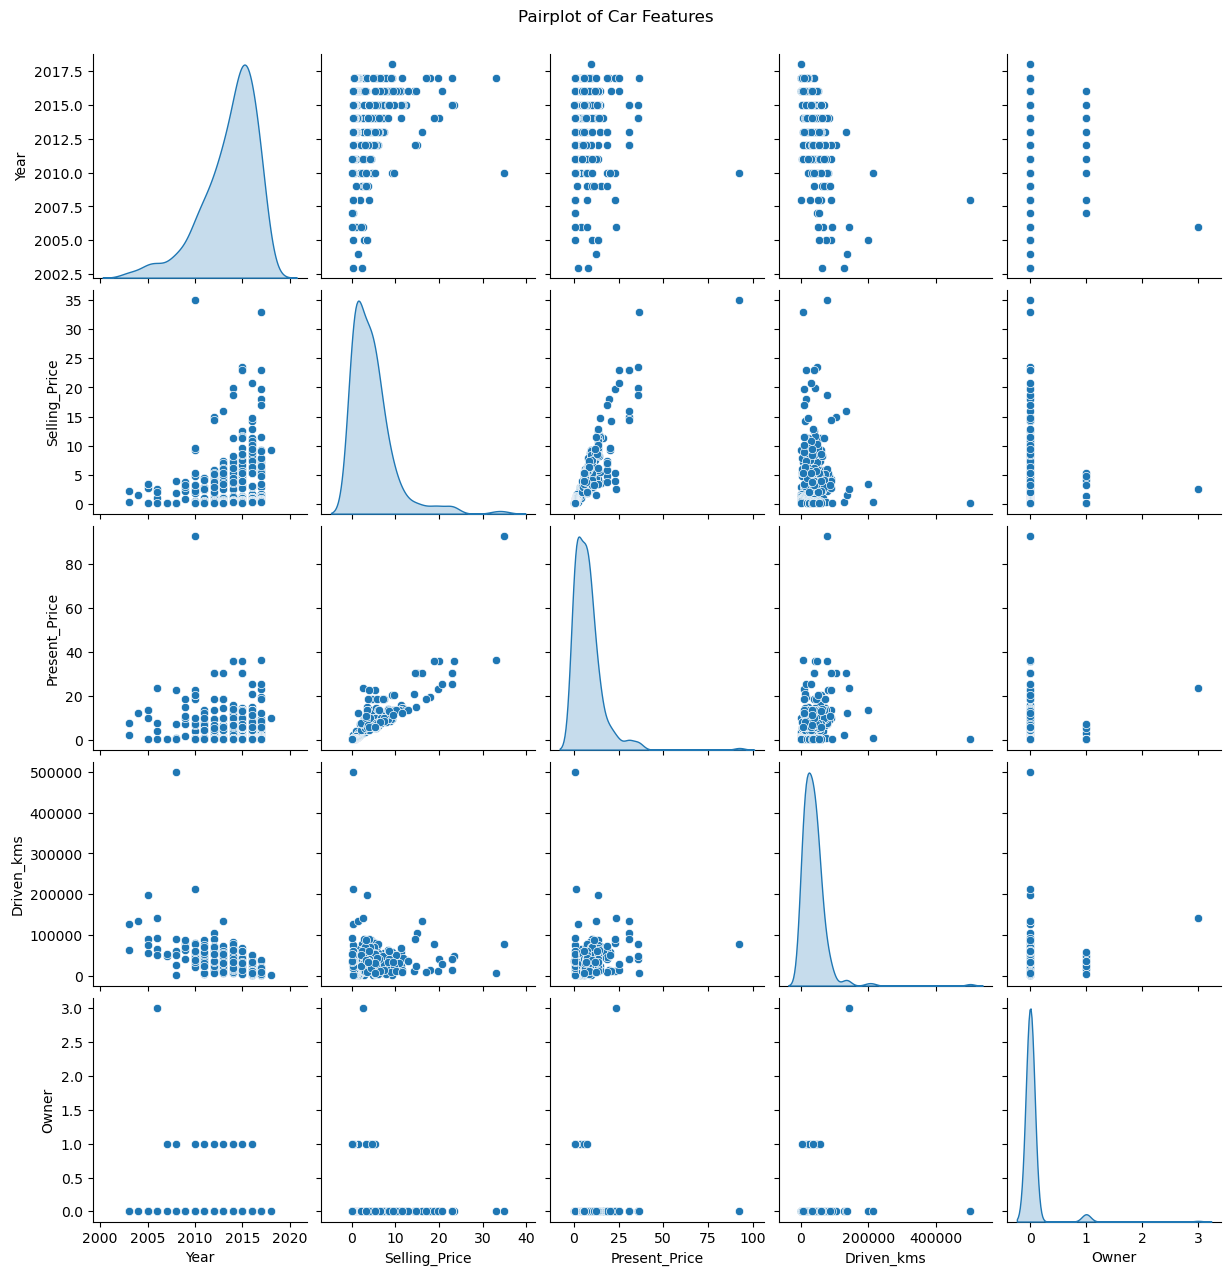

In [37]:
#Pair Plot
sns.pairplot(df, diag_kind='kde')
plt.suptitle("Pairplot of Car Features", y=1.02)
plt.show()


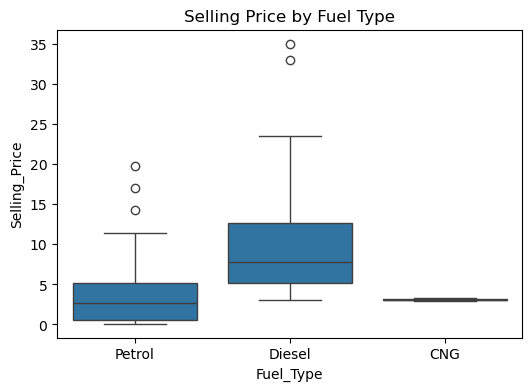

In [38]:
#Box Plot of Price vs Fuel Type
plt.figure(figsize=(6,4))
sns.boxplot(x='Fuel_Type', y='Selling_Price', data=df)
plt.title("Selling Price by Fuel Type")
plt.show()


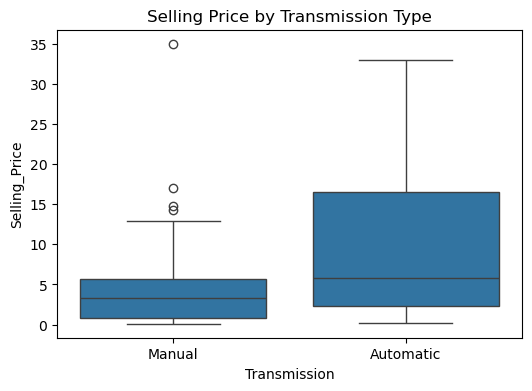

In [39]:
#Box Plot of Price vs Transmission
plt.figure(figsize=(6,4))
sns.boxplot(x='Transmission', y='Selling_Price', data=df)
plt.title("Selling Price by Transmission Type")
plt.show()
